<a href="https://colab.research.google.com/github/addu2612/House_Value_ML_Predicition/blob/main/RealEstate_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pd.read_csv("/content/drive/MyDrive/Practice_datasets/housing.csv")

In [29]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [30]:
!pip install ydata-profiling -q

In [31]:
from ydata_profiling import ProfileReport
profile_data=ProfileReport(df,title='Report')
profile_data


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
df['total_bedrooms'].value_counts()



280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [33]:
df.shape

(20640, 10)

In [35]:
df_shuffled=df.sample(n=len(df),random_state=1)
df_shuffled

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4712     -118.36     34.06                39.0       2810.0           670.0   
2151     -119.78     36.78                37.0       2185.0           455.0   
15927    -122.42     37.73                46.0       1819.0           411.0   
82       -122.28     37.81                52.0        340.0            97.0   
8161     -118.13     33.82                37.0       1530.0           290.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income  median_house_value  \
4712       1109.0       624.0         3.2500            355000.0   
2151       1143.0       438.0         1.9784             70700.0   
15927      1534.0       406.0         4.0132            229400.0   
82          200.0        87.0         1.5208            112500.0   
8161        711.0       283.0         5.1795            225400.0   
...           ...         ...            ...                 ...   
10955      1079.0       436.0         1.7823            205300.0   
17289       753.0       260.0         8.5608            500001.0   
5192        775.0       293.0         1.1326            104800.0   
12172      1323.0       477.0         2.6322            140700.0   
235        1009.0       390.0         2.3036            126000.0   

      ocean_proximity  
4712        <1H OCEAN  
2151           INLAND  
15927        NEAR BAY  
82           NEAR BAY  
8161        <1H OCEAN  
...               ...  
10955       <1H OCEAN  
17289       <1H OCEAN  
5192        <1H OCEAN  
12172          INLAND  
235          NEAR BAY  

[20640 rows x 10 columns]

In [36]:
crazy = pd.get_dummies(data=df_shuffled ,columns=['ocean_proximity'])
print(crazy)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4712     -118.36     34.06                39.0       2810.0           670.0   
2151     -119.78     36.78                37.0       2185.0           455.0   
15927    -122.42     37.73                46.0       1819.0           411.0   
82       -122.28     37.81                52.0        340.0            97.0   
8161     -118.13     33.82                37.0       1530.0           290.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income  media

In [37]:
df_final=crazy[['longitude','latitude' ,'housing_median_age' ,'total_rooms' , 'total_bedrooms', 'population',  'households',  'median_income',
                'ocean_proximity_<1H OCEAN' , 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',  'ocean_proximity_NEAR BAY' ,'ocean_proximity_NEAR OCEAN',
                'median_house_value'
                ]]
df_final

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
4712     -118.36     34.06                39.0       2810.0           670.0   
2151     -119.78     36.78                37.0       2185.0           455.0   
15927    -122.42     37.73                46.0       1819.0           411.0   
82       -122.28     37.81                52.0        340.0            97.0   
8161     -118.13     33.82                37.0       1530.0           290.0   
...          ...       ...                 ...          ...             ...   
10955    -117.88     33.76                17.0       1768.0           474.0   
17289    -119.63     34.42                42.0       1765.0           263.0   
5192     -118.26     33.93                42.0       1433.0           295.0   
12172    -117.16     33.73                10.0       2381.0           454.0   
235      -122.20     37.79                35.0       1802.0           459.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
4712       1109.0       624.0         3.2500                          1   
2151       1143.0       438.0         1.9784                          0   
15927      1534.0       406.0         4.0132                          0   
82          200.0        87.0         1.5208                          0   
8161        711.0       283.0         5.1795                          1   
...           ...         ...            ...                        ...   
10955      1079.0       436.0         1.7823                          1   
17289       753.0       260.0         8.5608                          1   
5192        775.0       293.0         1.1326                          1   
12172      1323.0       477.0         2.6322                          0   
235        1009.0       390.0         2.3036                          0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
4712                        0                       0   
2151                        1                       0   
15927                       0                       0   
82                          0                       0   
8161                        0                       0   
...                       ...                     ...   
10955                       0                       0   
17289                       0                       0   
5192                        0                       0   
12172                       1                       0   
235                         0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
4712                          0                           0   
2151                          0                           0   
15927                         1                           0   
82                            1                           0   
8161                          0                           0   
...                         ...                         ...   
10955                         0                           0   
17289                         0                           0   
5192                          0                           0   
12172                         0                           0   
235                           1                           0   

       median_house_value  
4712             355000.0  
2151              70700.0  
15927            229400.0  
82               112500.0  
8161             225400.0  
...                   ...  
10955            205300.0  
17289            500001.0  
5192             104800.0  
12172            140700.0  
235              126000.0  

[20640 rows x 14 columns]

In [44]:
df_final=df_final.dropna()
len(df_final)

20433

In [45]:
train_pd,test_pd,val_pd=df_final[:18000],df_final[18000:19217],df_final[19215:]
len(train_pd),len(test_pd),len(val_pd)

(18000, 1217, 1218)

In [50]:
X_train,y_train=train_pd.to_numpy()[:,:-1],train_pd.to_numpy()[:,-1]

X_val,y_val=val_pd.to_numpy()[:,:-1],val_pd.to_numpy()[:,-1]

X_test,y_test=test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_val.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1218,))

In [74]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train contains 13 features
scaler = StandardScaler().fit(X_train[:,:8])

def preprocessor(X):
    A = np.copy(X)
    A[ :, :8] = scaler.transform(A[ : , :8])
    return A

X_train,X_val,X_test = preprocessor(X_train),preprocessor(X_val),preprocessor(X_test)
X_train.shape,X_val.shape,X_test.shape

((18000, 13), (1218, 13), (1217, 13))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

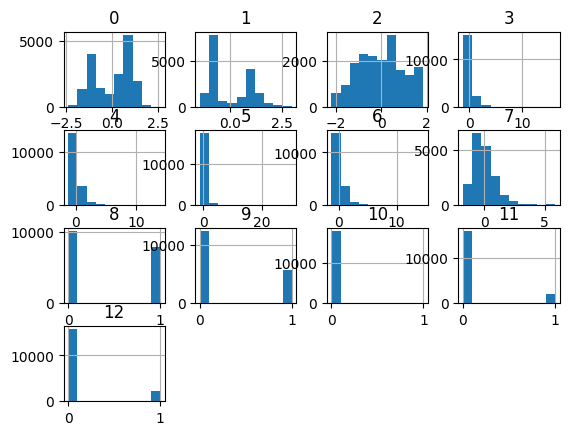

In [75]:
pd.DataFrame(X_train).hist()


In [79]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm=LinearRegression().fit(X_train,y_train)
mse(lm.predict(X_train),y_train,squared=False),mse(lm.predict(X_val),y_val,squared=False)

(68593.05578127236, 71382.43558330165)

In [83]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
mse(knn.predict(X_train),y_train,squared=False),mse(knn.predict(X_val),y_val,squared=False)

(53759.09908812057, 62161.22860469906)

In [86]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train,squared=False),mse(rfr.predict(X_val),y_val,squared=False)

(43456.02402831291, 53394.19861794135)

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(n_estimators=250).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train,squared=False),mse(gbr.predict(X_val),y_val,squared=False)

(47274.82259072157, 51376.13117797946)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [93]:
simple_nn=Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt=Adam(learning_rate=0.1)
cp=ModelCheckpoint('models/simple_nn',save_best_only=True)
simple_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),callbacks=[cp],epochs=100)




Epoch 1/100
563/563 [==============================] - 4s 5ms/step - loss: 50818433024.0000 - root_mean_squared_error: 225429.4375 - val_loss: 40909873152.0000 - val_root_mean_squared_error: 202261.8906
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 28922613760.0000 - root_mean_squared_error: 170066.5000 - val_loss: 18755270656.0000 - val_root_mean_squared_error: 136949.8906
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 13481134080.0000 - root_mean_squared_error: 116108.2891 - val_loss: 10027899904.0000 - val_root_mean_squared_error: 100139.4062
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 8258316288.0000 - root_mean_squared_error: 90875.2812 - val_loss: 7346259968.0000 - val_root_mean_squared_error: 85710.3281
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 6451959808.0000 - root_mean_squared_error: 80324.0938 - val_loss: 6234890752.0000 - val_root_mean_squared_error: 7896

In [94]:
from tensorflow.keras.models import load_model
simple_nn=load_model('models/simple_nn')
mse(simple_nn.predict(X_train),y_train,squared=False),mse(simple_nn.predict(X_val),y_val,squared=False)

39/39 [==============================] - 0s 2ms/step


(66467.7448258719, 68674.86062433761)

In [95]:
medium_nn=Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1,'linear'))

opt=Adam(learning_rate=0.1)
cp=ModelCheckpoint('models/medium_nn',save_best_only=True)
medium_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),callbacks=[cp],epochs=100)



Epoch 1/100
563/563 [==============================] - 4s 6ms/step - loss: 8604001280.0000 - root_mean_squared_error: 92757.7578 - val_loss: 5095848960.0000 - val_root_mean_squared_error: 71385.2188
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4470513664.0000 - root_mean_squared_error: 66861.8984 - val_loss: 4846149632.0000 - val_root_mean_squared_error: 69614.2891
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 4374306304.0000 - root_mean_squared_error: 66138.5391 - val_loss: 4643193344.0000 - val_root_mean_squared_error: 68140.9844
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4312563712.0000 - root_mean_squared_error: 65670.1094 - val_loss: 4654017536.0000 - val_root_mean_squared_error: 68220.3594
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 4281385728.0000 - root_mean_squared_error: 65432.2969 - val_loss: 4626498048.0000 - val_root_mean_squared_error: 68018.3672
Epoch

In [96]:
from tensorflow.keras.models import load_model
medium_nn=load_model('models/medium_nn')
mse(medium_nn.predict(X_train),y_train,squared=False),mse(medium_nn.predict(X_val),y_val,squared=False)

39/39 [==============================] - 0s 1ms/step


(51317.56625307835, 56065.46657306574)

In [97]:
large_nn=Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1,'linear'))

opt=Adam(learning_rate=0.1)
cp=ModelCheckpoint('models/large_nn',save_best_only=True)
large_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train,y=y_train,validation_data=(X_val,y_val),callbacks=[cp],epochs=100)



Epoch 1/100
563/563 [==============================] - 4s 5ms/step - loss: 6403683328.0000 - root_mean_squared_error: 80023.0156 - val_loss: 5288026624.0000 - val_root_mean_squared_error: 72718.8203
Epoch 2/100
563/563 [==============================] - 4s 7ms/step - loss: 4750754816.0000 - root_mean_squared_error: 68925.7188 - val_loss: 4197845248.0000 - val_root_mean_squared_error: 64790.7812
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 4266475776.0000 - root_mean_squared_error: 65318.2656 - val_loss: 4068052992.0000 - val_root_mean_squared_error: 63781.2891
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4115782912.0000 - root_mean_squared_error: 64154.3672 - val_loss: 4167008768.0000 - val_root_mean_squared_error: 64552.3711
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 3787259136.0000 - root_mean_squared_error: 61540.7109 - val_loss: 4135005696.0000 - val_root_mean_squared_error: 64304.0117
Epoch

In [99]:
from tensorflow.keras.models import load_model
large_nn=load_model('models/large_nn')
mse(large_nn.predict(X_train),y_train,squared=False),mse(large_nn.predict(X_val),y_val,squared=False)

39/39 [==============================] - 0s 2ms/step


(46753.016736706726, 53634.11558649224)